<a href="https://colab.research.google.com/github/Teri2023/Teri2023.github.io/blob/main/Data_Counting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [27]:
import pandas as pd
from collections import Counter
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [30]:
# Load the CSV file containing the text data
text_csv_file_path = '/content/drive/MyDrive/Jupiter/INFO690/masterdata.csv'  # Replace with your CSV file path

# Try reading the file with a different encoding, such as 'latin-1'
df_text = pd.read_csv(text_csv_file_path, encoding='latin-1')  # Try different encodings if 'latin-1' doesn't work
text_columns = ['Dairy1', 'Dairy2', 'Dairy3', 'Interview Answer']
df_text.head()


,Participant,NAME,AGE,OCCUPATION,GENDER,MARITAL STATUS,LOCATION,Dairy1,Dairy2,Dairy3,Inteview Question,Interview Answer
0,1,Nirmala,52,Home maker,F,MARRIED,"South River, NJ",Describe any wearable technology you use today...,Describe any wearable technology you use today...,Describe any wearable technology you use today...,1. Can you elaborate on how you set your daily...,I have a pacer app on my IWatch that continuou...
1,2,Mallika Batra,18,Dental Assistant,F,SINGLE,"Philadelphia, PA",Describe any wearable technology you used toda...,Describe any wearable technology you used toda...,Describe any wearable technology you used toda...,"1. Could you please provide your age, gender, ...","Yes, I'm an 18-year-old female, single, a curr..."
2,3,Alex,37,Director,M,MARRIED,"Doylestown, PA",7:30 AM: Put my Apple Watch on\n8:00 AM: Check...,8:45 AM: Put my Apple Watch on\n9:00 AM: Check...,9:00 AM: Put my Apple Watch on\n9:30 AM: Check...,NaN,NaN
3,4,Minh Tran,49,Financial Manager,F,MARRIED,New Jersey,6:00 AM: Woke up and quickly checked my sleep ...,6:30 AM: Woke up and checked my Apple Watch fo...,5:45 AM: Woke up early to get a head start on ...,1. Describe any wearable technology you used t...,"I used my Apple Watch for various purposes, in..."


In [31]:
# Load the CSV file containing the two-word phrases
phrases_csv_file_path = '/content/drive/MyDrive/Jupiter/INFO690/activities.csv'  # Replace with your CSV file path

df_phrases = pd.read_csv(phrases_csv_file_path)
df_phrases.head(10)

,Activity,Activity1,App
0,Step,Tracking,Activity
1,Heart,Monitoring,Health
2,Guided,Meditation,Health
3,Workout,Tracking,Workout
4,Stress,Management,Health
5,Activity,Rings,Activity
6,Goal,Setting,Activity
7,Hiking,Motivation,Activity
8,Sleep,Monitoring,Health
9,Daily,Routine,Calendar


In [32]:
# Function to count two-word phrases
def count_word_phrases(text, phrase):
    # Use regular expressions to find exact matches of the two-word phrase
    pattern = r'\b' + re.escape(phrase) + r'\b'
    return len(re.findall(pattern, text, re.IGNORECASE))

# Extract the list of two-word phrases
word_phrases = df_phrases['Activity'].tolist()

# Initialize a Counter object
phrase_counts = Counter()

# Iterate over each row and each specified column in the DataFrame to count occurrences of each two-word phrase
for index, row in df_text.iterrows():
    for column in text_columns:
        text = str(row[column])
        for phrase in word_phrases:
            phrase_counts[phrase] += count_word_phrases(text, phrase)

def add_phrase_counts_to_csv(df_phrases, phrase_counts, output_file_path):
    df_phrases['Counts'] = df_phrases['Activity'].apply(lambda x: phrase_counts[x])
    df_phrases.to_csv(output_file_path, index=False)
    print(f"Phrase counts added to {output_file_path}")

# Add phrase counts to the phrases CSV file and save it
#output_file_path = ''  # Replace with your desired output file path
add_phrase_counts_to_csv(df_phrases, phrase_counts, phrases_csv_file_path)

Phrase counts added to /content/drive/MyDrive/Jupiter/INFO690/activities.csv


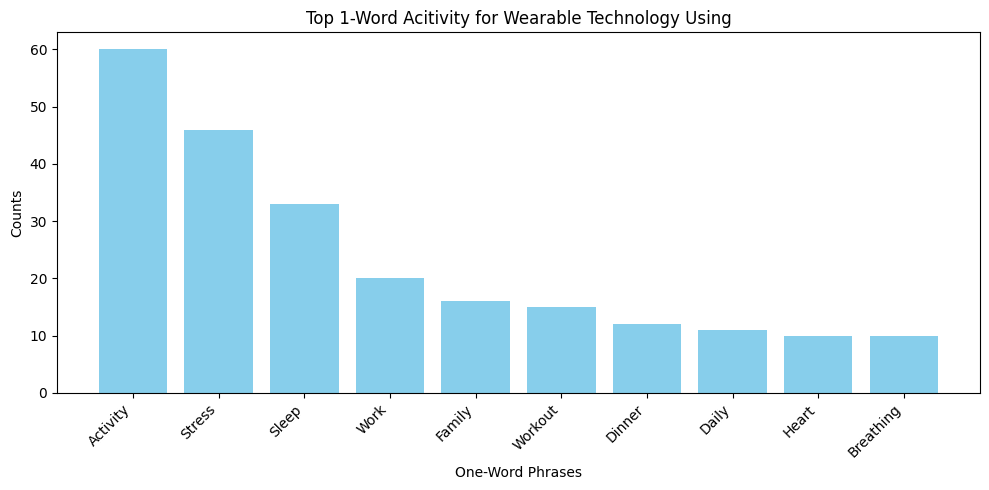

In [19]:
# Get the most common phrases and their counts
most_common_phrases = phrase_counts.most_common(10)  # Change the number to display top N phrases
phrases, counts = zip(*most_common_phrases)

# Plotting the most common two-word phrases
plt.figure(figsize=(10, 5))
plt.bar(phrases, counts, color='skyblue')
plt.xlabel('One-Word Phrases')
plt.ylabel('Counts')
plt.title('Top 1-Word Acitivity for Wearable Technology Using')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

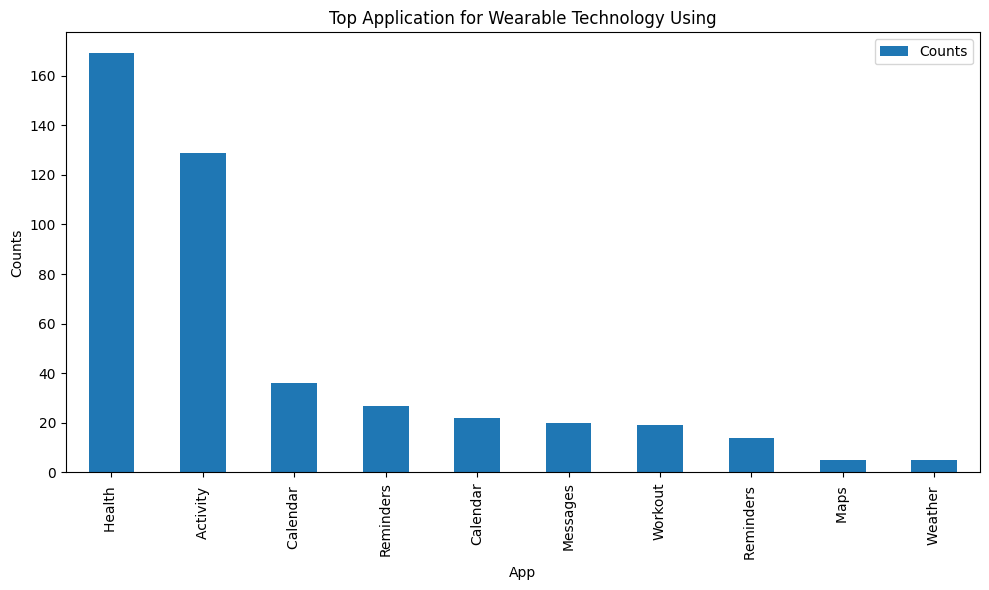

In [20]:
 df_phrases.groupby('App')['Counts'].sum().reset_index().sort_values(by='Counts', ascending=False).head(10).plot(kind='bar', x='App', y='Counts', figsize=(10, 6))
 plt.title('Top Application for Wearable Technology Using')
 plt.tight_layout()
 plt.show()

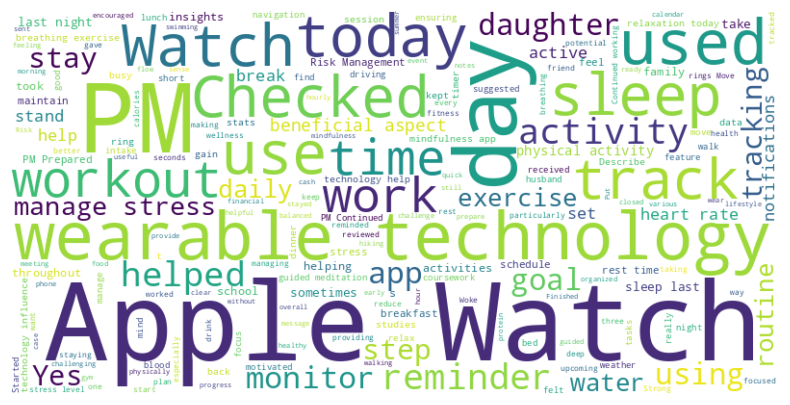

In [34]:
def generate_word_cloud(df, text_columns):
    # Combine all text from the specified columns into a single string
    combined_text = ' '.join(df[text_columns].astype(str).apply(lambda x: ' '.join(x), axis=1))
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
generate_word_cloud(df_text, text_columns)